In [1]:
import pyforest
from matplotlib.animation import FuncAnimation
import psutil
import collections
import matplotlib

In [2]:
df = pd.read_csv("h_vs_t.csv", header = [0], delimiter = "\t")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,t,h
0,1.000,24000.1
1,2.001,24000.6
2,3.002,24001.3
3,4.003,24002.3
4,5.003,24003.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

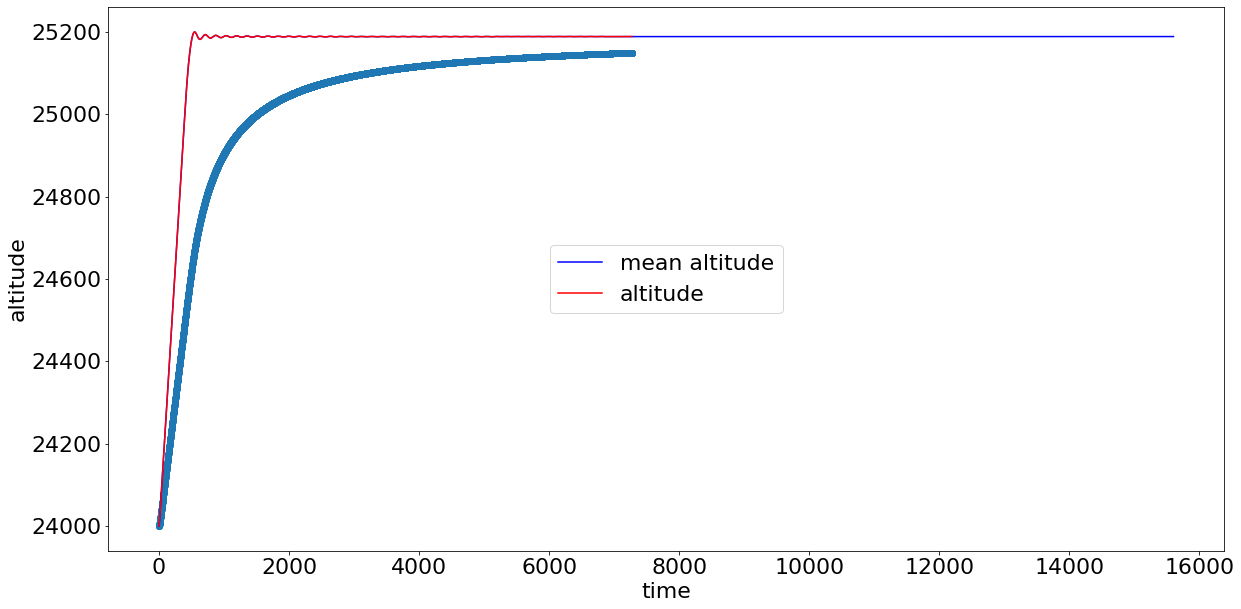

In [4]:
plt.rcParams["figure.figsize"] = [20, 10]
matplotlib.rcParams.update({'font.size': 22})
# fig.set_size_inches(1, 10.5)
# plt.rcParams["figure.autolayout"] = True
# plt.axis([0, 10, 0, 1])
indexes= []
means = []
current_mean = df.h[0]
for index  in range(df.index.start+1, df.index.stop-1):
    previous_mean = current_mean
    current_mean = (index*previous_mean + df.iloc[index].h)/(index+1) 
    
    indexes.append(index);
    means.append(current_mean);
    
    if current_mean > 25200 * 99.8/100:
        break
plt.scatter(indexes,means);
plt.plot(df["t"], df["h"], "blue")
plt.plot(df["t"][:indexes[-1]], df["h"][:indexes[-1]], "red")
plt.legend(["mean altitude","altitude"], loc ="center")
plt.xlabel("time")
plt.ylabel("altitude")
plt.show()

### Here we calculate moving average value of altitude h to see how it behaves compares to altitude
Here our criteria is to break the cycle when we have 99.8% closness to the value we want. 
As it is clear from the graph, the cycle brakes after around 8000 iteration. 
